In [113]:
%matplotlib inline

import datetime as dt
import numpy as np
import pandas as pd

import urllib.request
import json

from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils

%load_ext autotime
%load_ext snakeviz

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 13.8 ms


In [2]:
url = 'http://ergast.com/api/f1/2017/results.json?limit=100000000'
with urllib.request.urlopen(url) as response:
    encoding = response.info().get_content_charset('utf8')
    data = json.loads(response.read().decode(encoding))

In [3]:
data["MRData"].keys()

dict_keys(['xmlns', 'series', 'url', 'limit', 'offset', 'total', 'RaceTable'])

In [4]:
data["MRData"]["RaceTable"]["Races"][0].keys()

dict_keys(['season', 'round', 'url', 'raceName', 'Circuit', 'date', 'time', 'Results'])

In [5]:
data["MRData"]["RaceTable"]["Races"][0]["Results"]

[{'Constructor': {'constructorId': 'ferrari',
   'name': 'Ferrari',
   'nationality': 'Italian',
   'url': 'http://en.wikipedia.org/wiki/Scuderia_Ferrari'},
  'Driver': {'code': 'VET',
   'dateOfBirth': '1987-07-03',
   'driverId': 'vettel',
   'familyName': 'Vettel',
   'givenName': 'Sebastian',
   'nationality': 'German',
   'permanentNumber': '5',
   'url': 'http://en.wikipedia.org/wiki/Sebastian_Vettel'},
  'FastestLap': {'AverageSpeed': {'speed': '220.351', 'units': 'kph'},
   'Time': {'time': '1:26.638'},
   'lap': '53',
   'rank': '3'},
  'Time': {'millis': '5051672', 'time': '1:24:11.672'},
  'grid': '2',
  'laps': '57',
  'number': '5',
  'points': '25',
  'position': '1',
  'positionText': '1',
  'status': 'Finished'},
 {'Constructor': {'constructorId': 'mercedes',
   'name': 'Mercedes',
   'nationality': 'German',
   'url': 'http://en.wikipedia.org/wiki/Mercedes-Benz_in_Formula_One'},
  'Driver': {'code': 'HAM',
   'dateOfBirth': '1985-01-07',
   'driverId': 'hamilton',
   '

In [6]:
pd.DataFrame(data["MRData"]["RaceTable"]["Races"][0]["Results"]).head(1)

,Constructor,Driver,FastestLap,Time,grid,laps,number,points,position,positionText,status
0,"{'constructorId': 'ferrari', 'url': 'http://en...","{'driverId': 'vettel', 'permanentNumber': '5',...","{'rank': '3', 'lap': '53', 'Time': {'time': '1...","{'millis': '5051672', 'time': '1:24:11.672'}",2,57,5,25,1,1,Finished


In [7]:
def constructor_to_name(dic):
    return dic["name"]

def driver_to_name(dic):
    return dic["familyName"]

def date_to_year(date):
    date = dt.datetime.strptime(date, '%Y-%m-%d')
    return date.year

In [15]:
listOfRaces = []

for seasonYear in range(2005,2018):
    
    url = 'http://ergast.com/api/f1/{seasonYear}/results.json?limit=100000000'.format(seasonYear=seasonYear)
    with urllib.request.urlopen(url) as response:
        encoding = response.info().get_content_charset('utf8')
        data = json.loads(response.read().decode(encoding))

    for race in data["MRData"]["RaceTable"]["Races"]:

        year = race['season']
        circuit = race["Circuit"]["circuitName"]

#         print("{Year} - {Circuit}".format(Year=year,Circuit=circuit))

        df = pd.DataFrame(race["Results"])
        df["Constructor"] = df["Constructor"].apply(constructor_to_name)
        df["Driver"] = df["Driver"].apply(driver_to_name)
        df["Circuit"] = circuit
        df["Year"] = year
        listOfRaces.append(df.copy())

In [17]:
results = pd.concat(listOfRaces)

In [18]:
results.head()

,Circuit,Constructor,Driver,FastestLap,Time,Year,grid,laps,number,points,position,positionText,status
0,Albert Park Grand Prix Circuit,Renault,Fisichella,"{'rank': '2', 'lap': '55', 'Time': {'time': '1...","{'millis': '5057336', 'time': '1:24:17.336'}",2005,1,57,6,10,1,1,Finished
1,Albert Park Grand Prix Circuit,Ferrari,Barrichello,"{'rank': '3', 'lap': '54', 'Time': {'time': '1...","{'millis': '5062889', 'time': '+5.553'}",2005,11,57,2,8,2,2,Finished
2,Albert Park Grand Prix Circuit,Renault,Alonso,"{'rank': '1', 'lap': '24', 'Time': {'time': '1...","{'millis': '5064048', 'time': '+6.712'}",2005,13,57,5,6,3,3,Finished
3,Albert Park Grand Prix Circuit,Red Bull,Coulthard,"{'rank': '11', 'lap': '40', 'Time': {'time': '...","{'millis': '5073467', 'time': '+16.131'}",2005,5,57,14,5,4,4,Finished
4,Albert Park Grand Prix Circuit,Williams,Webber,"{'rank': '8', 'lap': '37', 'Time': {'time': '1...","{'millis': '5074244', 'time': '+16.908'}",2005,3,57,7,4,5,5,Finished


In [20]:
results["status"].unique()

array(['Finished', '+1 Lap', '+2 Laps', '+4 Laps', 'Accident', 'Gearbox',
       '+3 Laps', 'Tyre', 'Collision', 'Spun off', 'Engine', 'Suspension',
       'Clutch', 'Brakes', 'Hydraulics', 'Electrical', 'Driveshaft',
       'Disqualified', 'Wheel rim', 'Puncture', '+5 Laps', 'Withdrew',
       'Fuel pressure', '+12 Laps', '+7 Laps', '+11 Laps', 'Engine fire',
       'Retired', 'Mechanical', '+26 Laps', 'Tyre puncture',
       'Out of fuel', 'Wheel nut', 'Transmission', 'Steering',
       'Broken wing', 'Electronics', 'Heat shield fire', 'Exhaust',
       'Oil leak', 'Technical', 'Water leak', 'Fuel pump', 'Track rod',
       '+17 Laps', 'Oil pressure', 'Pneumatics', 'Throttle', 'Front wing',
       'Water pressure', 'Refuelling', 'Wheel', 'Radiator', 'Overheating',
       'Driver Seat', 'Differential', 'Injured', '+10 Laps', '+6 Laps',
       '+9 Laps', 'Rear wing', 'Did not qualify', '+42 Laps',
       'Engine misfire', 'Injury', '+14 Laps', 'Vibrations', 'Alternator',
       'Collis

# First Version - Types of problems

In [21]:
results1 = results.copy()

In [31]:
results1 = results1[(results1["status"] != "Injured") & (results1["status"] != "Did not qualify")]

In [33]:
listFinished = [
    "Finished",
    "+1 Lap",
    "+2 Laps",
    "+4 Laps",
    "+3 Laps",
    "+5 Laps",
    "+12 Laps",
    "+7 Laps",
    "+11 Laps",
    "+26 Laps",
    "+17 Laps",
    "+10 Laps",
    "+6 Laps",
    "+9 Laps",
    "+42 Laps",
    "+14 Laps",
    "+8 Laps",
]

results1.replace(listFinished,value="Finished",inplace=True)

In [42]:
statuss = results1["status"]
statuss[statuss != "Finished"] = "DNF"
results1["status"] = statuss

/Users/PedroBraz2/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/PedroBraz2/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:4702: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/Users/PedroBraz2/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2885: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user

In [56]:
xcols = [
    "Circuit",
    "Constructor",
    "Driver",
    "Year",
]

ycols = [
    "status",
]

results1 = results1[xcols+ycols]

results1.head()

,Circuit,Constructor,Driver,Year,status
0,Albert Park Grand Prix Circuit,Renault,Fisichella,2005,Finished
1,Albert Park Grand Prix Circuit,Ferrari,Barrichello,2005,Finished
2,Albert Park Grand Prix Circuit,Renault,Alonso,2005,Finished
3,Albert Park Grand Prix Circuit,Red Bull,Coulthard,2005,Finished
4,Albert Park Grand Prix Circuit,Williams,Webber,2005,Finished


In [45]:
results1["Year"] = pd.to_numeric(results1["Year"])

In [92]:
sieve = 2015

results1_dummies = pd.get_dummies(results1)

training_data = results1_dummies.loc[results1["Year"] <= sieve]
test_data = results1_dummies.loc[results1["Year"] > sieve]

X_training = training_data[results1_dummies.columns[:-2]]
y_training = training_data[results1_dummies.columns[-2:]]
X_test = test_data[results1_dummies.columns[:-2]]
y_test = test_data[results1_dummies.columns[-2:]]

time: 33.4 ms


In [132]:
model = Sequential()

# input should have 132
model.add(Dense(512 * 4, input_shape=(141,)))
model.add(Activation('sigmoid'))

# output should have 10 (0-9)
model.add(Dense(2))
model.add(Activation('softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

time: 85.1 ms


In [133]:
model.fit(X_training, y_training, epochs=10, batch_size=50, verbose=0);

time: 6.6 s


In [134]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy = {:.4f}".format(accuracy))

Accuracy = 0.7923
time: 166 ms


In [135]:
predictions_prob = pd.DataFrame(model.predict(X_training))

time: 328 ms


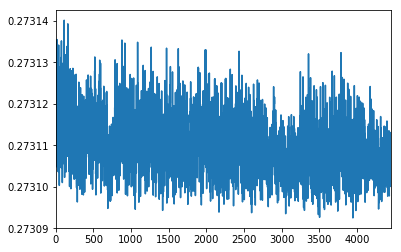

time: 360 ms


In [138]:
predictions_prob[0].plot()

In [137]:
predictions_prob.head()

,0,1
0,0.273115,0.726886
1,0.273105,0.726895
2,0.273109,0.726891
3,0.273116,0.726884
4,0.273116,0.726884


time: 12.8 ms


# Future approaches:

include qualifying data